# K-Nearest Neighbors

### Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

### Importing data

In [3]:
data = pd.read_csv('../data/spotify_features.csv', sep=',')
data.head()

,track_popularity,instrumentalness,duration_ms,energy,acousticness,album_month,album_year,danceability,loudness,liveness,genre_code,valence,artist_code
0,67.0,0.004210,162600.0,0.815,0.0724,12,2019,0.726,-4.969,0.35700,2,0.693000,4535
1,70.0,0.000023,176616.0,0.931,0.0794,7,2019,0.675,-3.432,0.19031,2,0.613000,7724
2,60.0,0.000009,169093.0,0.930,0.0287,7,2019,0.718,-3.778,0.20400,2,0.509838,6862
3,62.0,0.000000,187675.0,0.856,0.1870,7,2019,0.449,-4.788,0.17600,2,0.152000,3635
4,58.0,0.000005,207894.0,0.923,0.1460,6,2019,0.679,-6.500,0.12400,2,0.752000,2056


### Preprocessing

In [4]:
model = Pipeline([
    ('scaler', StandardScaler()),
    ('rfr', RandomForestRegressor(random_state=1))
])

X = data.drop(columns=['track_popularity'])
y = data['track_popularity']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25)

print(f'Training set: {X_train.shape}, {y_train.shape}')
print(f'Validation set: {X_val.shape}, {y_val.shape}')
print(f'Test set: {X_test.shape}, {y_test.shape}')

Training set: (11908, 12), (11908,)
Validation set: (3970, 12), (3970,)
Test set: (3970, 12), (3970,)


### Model training

In [5]:
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('rfr', RandomForestRegressor(random_state=1))])

### Model Evaluation

In [6]:
# Evaluate the model
train_score = model.score(X_train, y_train)
val_score = model.score(X_val, y_val)
test_score = model.score(X_test, y_test)

print(f"Train R^2: {train_score:.2f}")
print(f"Validation R^2: {val_score:.2f}")
print(f"Test R^2: {test_score:.2f}")

mae = mean_absolute_error(y_test, model.predict(X_test))
print(f'MAE: {mae:.2f}')
mse = mean_squared_error(y_test, model.predict(X_test))
print(f'MSE: {mse:.2f}')

Train R^2: 0.89
Validation R^2: 0.23
Test R^2: 0.23
MAE: 17.04
MSE: 442.67


### Cross-validation #1

In [7]:
scores = cross_validate(model, X, y, cv=6, return_train_score=True)
pd.DataFrame(scores)

,fit_time,score_time,test_score,train_score
0,13.701566,0.055596,0.076796,0.891912
1,13.794222,0.051090,0.074013,0.892876
2,13.436232,0.048584,-0.034012,0.895214
3,13.958077,0.052941,0.147569,0.886854
4,14.123813,0.053093,0.032066,0.891617
5,13.973768,0.051100,0.150645,0.888548


### Hyperparameter Tuning

In [11]:
# Define the pipeline with RandomForestRegressor
model = Pipeline([
    ('scaler', StandardScaler()),
    ('rfr', RandomForestRegressor(random_state=1))
])

# Define the parameter grid for RandomForestRegressor
param_grid = {
    'rfr__n_estimators': [100, 200, 300],
    'rfr__max_depth': [10, 20, 25],             # Maximum depth of the tree
    'rfr__min_samples_split': [2, 5, 10],             # Minimum samples required to split a node
    'rfr__min_samples_leaf': [1, 2, 4],               # Minimum samples required at each leaf node
    'rfr__max_features': ['sqrt', 'log2']     # Number of features to consider at each split
}

# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=4, scoring='r2', n_jobs=8, error_score='raise')

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best model and parameters
best_model = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")

# Evaluate the best model on training, validation, and test sets
train_score = best_model.score(X_train, y_train)
val_score = best_model.score(X_val, y_val)
test_score = best_model.score(X_test, y_test)

print(f"Best Model Train R^2: {train_score:.2f}")
print(f"Best Model Validation R^2: {val_score:.2f}")
print(f"Best Model Test R^2: {test_score:.2f}")

# Calculate error metrics on test data
y_test_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
print(f"Best Model MAE: {mae:.2f}")
print(f"Best Model MSE: {mse:.2f}")

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters: {'rfr__max_depth': 25, 'rfr__max_features': 'sqrt', 'rfr__min_samples_leaf': 1, 'rfr__min_samples_split': 2, 'rfr__n_estimators': 300}
Best Model Train R^2: 0.89
Best Model Validation R^2: 0.23
Best Model Test R^2: 0.23
Best Model MAE: 17.04
Best Model MSE: 438.93


### Cross-validation #2

In [12]:
scores = cross_validate(model, X, y, cv=6, return_train_score=True)
pd.DataFrame(scores)

,fit_time,score_time,test_score,train_score
0,14.369728,0.058154,0.076796,0.891912
1,14.042408,0.052086,0.074013,0.892876
2,13.536137,0.049617,-0.034012,0.895214
3,14.185144,0.050154,0.147569,0.886854
4,14.030386,0.055571,0.032066,0.891617
5,14.355008,0.059449,0.150645,0.888548


### Visualizations

#### Feature Importance

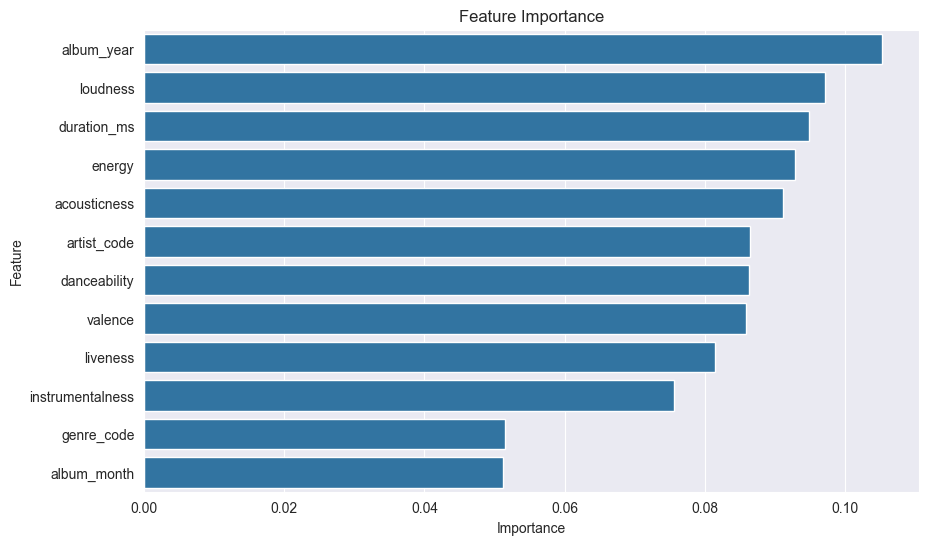

In [13]:
feature_importances = best_model.named_steps['rfr'].feature_importances_
features = X.columns

importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()

#### Actual vs Predicted

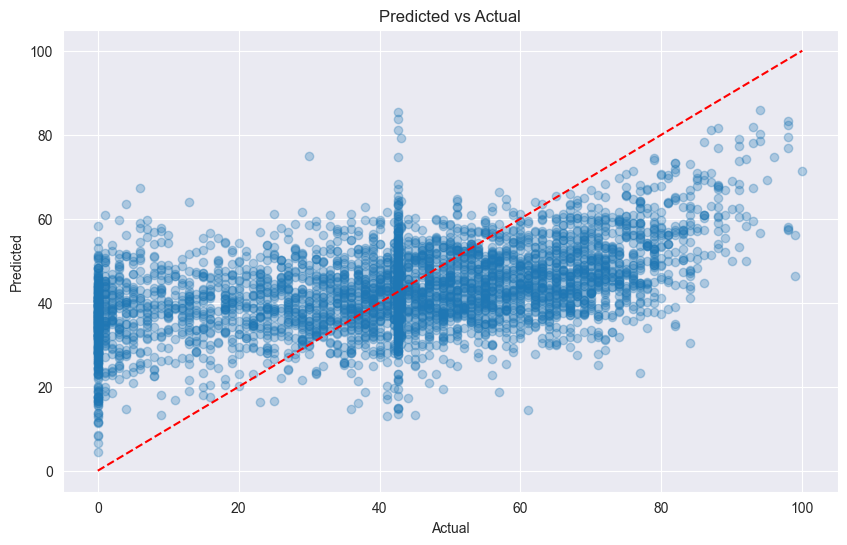

In [14]:
y_pred = best_model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual')
plt.show()

#### Residuals

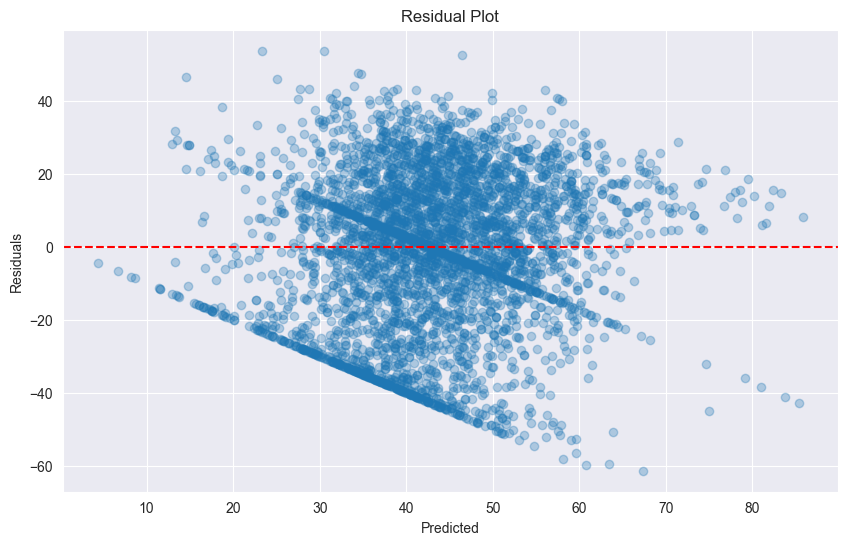

In [15]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.3)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()